# Relatório de Análise Exploratória de Dados (EDA) - E-commerce

## Tarefas: 

- Realizar a leitura dos arquivos disponibilizados no diretório /etapa_3/data/;

- Armazenar os dados em um banco de dados relacional (SQLite);

- Realizar consultas utilizando SQL diretamente no banco criado;

- Aplicar técnicas de análise exploratória utilizando pandas e bibliotecas de visualização.

# 1. Introdução

##### O objetivo desta análise é obter um entendimento aprofundado sobre o comportamento de clientes e vendedores, a dinâmica dos pedidos, a performance de produtos e logística, e os aspectos financeiros da operação. A EDA serve como base para identificar padrões, tendências, anomalias e gerar insights que podem informar decisões estratégicas e análises futuras.

# 2. Metodologia

##### A análise foi conduzida utilizando SQL para extração e agregação inicial dos dados diretamente do banco de dados, e Python com as bibliotecas Pandas, Matplotlib e Seaborn para manipulação, análise e visualização dos dados. As principais áreas exploradas incluem: status e volume de pedidos, distribuição geográfica de clientes e vendedores, performance de produtos por categoria, satisfação do cliente através de avaliações, eficiência logística, aspectos financeiros e tendências temporais.

# 3. Principais Descobertas

### 3.1. Análise de Pedidos
Exploramos o status dos pedidos, identificando que a grande maioria foi entregue com sucesso. Analisamos o volume de pedidos ao longo do tempo, observando tendências mensais

### 3.2. Análise de Clientes

##### Analisamos a distribuição geográfica dos clientes, identificando os estados com maior concentração.

### 3.3. Análise de Vendedores

##### Identificamos os vendedores com maior volume de pedidos processados.

### 3.4. Análise de Produtos


##### Identificamos as categorias de produtos mais populares em termos de volume de pedidos e receita gerada. Analisamos também a nota média de avaliação por categoria de produto.

### 3.5. Análise de Logística

##### Exploramos o fluxo de pedidos entre estados e, crucialmente, analisamos a relação entre o status de entrega e as notas de avaliação recebidas.

### 3.6. Análise Financeira


##### Analisamos a distribuição dos métodos de pagamento utilizados e o valor total pago nos pedidos ao longo do tempo.

### 3.7. Análise de Avaliações


##### Examinamos a distribuição geral das notas de avaliação e como elas variam por categoria de produto e status de entrega.

# 4. SETUP E CONFIGURAÇÃO: ÍNICIO DO CÓDIGO PARA O PROCESSO DE ANÁLISE

### 4.1. Importação de bibliotecas

In [72]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns


### 4.2. Configuração

In [65]:
## Adiciona o caminho para os arquivos de dados

data_folder = './data/'

## Define o banco de dados

db_name = 'fadesp_desafio.db'
db_path = os.path.join(data_folder, db_name)

### 4.3. Criação do Banco de Dados

In [38]:
## Carrega os arquivos .csv e salvando no Banco de Dados SQLite

print("Iniciando o processo de carregamento para o SQLite")

## Lista os arquivos .csv na pasta de dados

arquivos_csv = []
try:
    arquivos_csv = [ f for f in os.listdir(data_folder) if f.endswith('.csv') ]
    print(f"Encontrados {len(arquivos_csv)} arquivos .csv na pasta: {data_folder}")

    if not arquivos_csv:
        print("Nenhum arquivo .csv encontrado na pasta")

except Exception as e:
    print(f"Erro ao listar os arquivos .csv na pasta: {data_folder}")
    print(f"Erro: {e}")

## Cria o banco de dados SQLite
conn = None 
try:
    # Estabelece a conexão com o banco de dados.

    conn = sqlite3.connect(db_name)
    print(f"\nConectado ao banco de dados: {db_name}")

    # Loop através de cada arquivo CSV encontrado
    for arquivo_csv in arquivos_csv:
        caminho_arquivo = os.path.join(data_folder, arquivo_csv)
        # Deriva o nome da tabela no banco de dados a partir do nome do arquivo CSV
        # Por exemplo: 'clientes.csv' se torna a tabela 'clientes'
        table_name = os.path.splitext(arquivo_csv)[0]

        print(f"\nProcessando arquivo: '{arquivo_csv}' -> Tabela: '{table_name}'...")

        try:
            # Carregar o CSV para um DataFrame pandas
            df = pd.read_csv(caminho_arquivo)
            print(f"Arquivo '{arquivo_csv}' carregado no DataFrame (linhas: {len(df)}).")

            # Salvar o DataFrame no banco de dados como uma tabela
            # if_exists='replace' irá substituir a tabela se ela já existir.
            # index=False evita salvar o índice do DataFrame como uma coluna no DB.
            df.to_sql(table_name, conn, if_exists='replace', index=False)
            print(f"DataFrame salvo com sucesso na tabela '{table_name}' no banco de dados.")

        except Exception as e:
            print(f"Erro ao processar o arquivo {arquivo_csv}: {e}")

    # --- Verificação: Listar as tabelas criadas no banco de dados ---
    print("\n--- Verificando tabelas criadas no banco de dados ---")
    cursor = conn.cursor()
    # Consulta SQL padrão para listar todas as tabelas em um banco SQLite
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tabelas = cursor.fetchall()

    if tabelas:
        print("Tabelas encontradas no banco de dados:")
        # O resultado fetchall() retorna uma lista de tuplas, onde cada tupla tem um item (o nome da tabela)
        for tabela in tabelas:
            print(f"- {tabela[0]}")
    else:
        print("Aviso: Nenhuma tabela encontrada no banco de dados.")

except Exception as e:
    print(f"Ocorreu um erro geral ao interagir com o banco de dados SQLite: {e}")

finally:
    # Garante que a conexão com o banco de dados seja fechada, mesmo se ocorrer um erro
    if conn:
        conn.close()
        print("\nConexão com o banco de dados fechada.")

print("\nProcesso de carga de dados concluído")

Iniciando o processo de carregamento para o SQLite
Encontrados 9 arquivos .csv na pasta: ./data/

Conectado ao banco de dados: fadesp_desafio.db

Processando arquivo: 'avaliacoes_pedidos.csv' -> Tabela: 'avaliacoes_pedidos'...
Arquivo 'avaliacoes_pedidos.csv' carregado no DataFrame (linhas: 99224).
DataFrame salvo com sucesso na tabela 'avaliacoes_pedidos' no banco de dados.

Processando arquivo: 'categorias_produtos.csv' -> Tabela: 'categorias_produtos'...
Arquivo 'categorias_produtos.csv' carregado no DataFrame (linhas: 71).
DataFrame salvo com sucesso na tabela 'categorias_produtos' no banco de dados.

Processando arquivo: 'clientes.csv' -> Tabela: 'clientes'...
Arquivo 'clientes.csv' carregado no DataFrame (linhas: 99441).
DataFrame salvo com sucesso na tabela 'clientes' no banco de dados.

Processando arquivo: 'geolocalizacao.csv' -> Tabela: 'geolocalizacao'...
Arquivo 'geolocalizacao.csv' carregado no DataFrame (linhas: 1000163).
DataFrame salvo com sucesso na tabela 'geolocaliza

### 4.4. Conectar com o Banco de Dados e Visualizar as Tabelas

In [39]:
db_name = 'fadesp_desafio.db'

# Estabelecer a conexão
try:
    conn = sqlite3.connect(db_name)
    print(f"Conectado ao banco de dados: {db_name}")

    # O objeto 'conn' será usado para executar consultas SQL

except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")
    conn = None

## Listar as Tabelas e Explorar o Conteúdo
if conn:
    print("Tabelas disponíveis no banco de dados")
    try:
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tabelas = cursor.fetchall()

        if tabelas:
            print("Tabelas encontradas:")
            for tabela in tabelas:
                print(f"- {tabela[0]}")
        else:
            print("Nenhuma tabela encontrada.")

        # --- Explorar as primeiras linhas para conferir as tabelas ---
        print("\n--- Explorando as primeiras 5 linhas de algumas tabelas ---")

        tabelas_para_explorar = ['pedidos', 'clientes', 'produtos', 'itens_pedidos'] 

        for tabela_nome in tabelas_para_explorar:
            if (tabela_nome,) in tabelas: # Verifica se a tabela existe
                print(f"Tabela: '{tabela_nome}'")
                query_exploracao = f"SELECT * FROM {tabela_nome} LIMIT 5;"
                try:
                    # Usar pandas para ler o resultado da consulta SQL diretamente para um DataFrame
                    df_exploracao = pd.read_sql_query(query_exploracao, conn)
                    print(df_exploracao.to_markdown(index=False))
                except Exception as e:
                    print(f"Erro ao consultar a tabela '{tabela_nome}': {e}")
            else:
                 print(f"Tabela '{tabela_nome}' não encontrada no banco de dados.")


    except Exception as e:
        print(f"Ocorreu um erro ao listar tabelas ou explorar: {e}")




Conectado ao banco de dados: fadesp_desafio.db
Tabelas disponíveis no banco de dados
Tabelas encontradas:
- avaliacoes_pedidos
- categorias_produtos
- clientes
- geolocalizacao
- itens_pedidos
- pedidos
- pedidos_pagamentos
- produtos
- vendedores

--- Explorando as primeiras 5 linhas de algumas tabelas ---
Tabela: 'pedidos'
| order_id                         | customer_id                      | order_status   | order_purchase_timestamp   | order_approved_at   | order_delivered_carrier_date   | order_delivered_customer_date   | order_estimated_delivery_date   |
|:---------------------------------|:---------------------------------|:---------------|:---------------------------|:--------------------|:-------------------------------|:--------------------------------|:--------------------------------|
| e481f51cbdc54678b7cc49136f2d6af7 | 9ef432eb6251297304e76186b10a928d | delivered      | 2017-10-02 10:56:33        | 2017-10-02 11:07:15 | 2017-10-04 19:55:00            | 2017-10-10 21:25:1

### 4.5. Análise Exploratória de Dados

##### 4.5.1. Análise Exploratória de Dados Inicial

In [ ]:
print("\nAnálise Exploratória Inicial")


if conn: # Verifica se a conexão com o banco de dados está ativa
    try:
        # Contagem de registros em tabelas chave
        print("\nContagem de registros por tabela:")
        tabelas_para_contar = ['pedidos', 'clientes', 'produtos', 'itens_pedidos', 'pedidos_pagamentos', 
                               'vendedores', 'geolocalizacao', 'avaliacoes_pedidos', 'categorias_produtos']
        
        for tabela_nome in tabelas_para_contar:
                    try:
                        # Consulta SQL para contar todas as linhas na tabela
                        query_count = f"SELECT COUNT(*) AS total_registros FROM {tabela_nome};"
                        df_count = pd.read_sql_query(query_count, conn)
                        total_registros = df_count['total_registros'][0]
                        print(f"- Tabela '{tabela_nome}': {total_registros} registros")
                    except Exception as e:
                        print(f"Erro ao contar registros na tabela '{tabela_nome}': {e}")

        # Contagem de valores únicos para IDs chave
        print("\nContagem de IDs únicos:")

        # Tabela e coluna para contar IDs únicos
        ids_unicos_para_contar = [
            ('clientes', 'customer_unique_id', 'Clientes únicos'),
            ('pedidos', 'order_id', 'Pedidos únicos'),
            ('produtos', 'product_id', 'Produtos únicos'),
            ('vendedores', 'seller_id', 'Vendedores únicos')
        ] 

        for tabela_nome, coluna_id, descricao in ids_unicos_para_contar:
            try:
                # Consulta SQL para contar valores distintos na coluna de ID
                query_unique = f"SELECT COUNT(DISTINCT {coluna_id}) AS total_unicos FROM {tabela_nome};"
                df_unique = pd.read_sql_query(query_unique, conn)
                total_unicos = df_unique['total_unicos'][0]
                print(f"- {descricao} ({coluna_id} na tabela '{tabela_nome}'): {total_unicos}")
            except Exception as e:
                print(f"Erro ao contar IDs únicos para '{coluna_id}' na tabela '{tabela_nome}': {e}")


    except Exception as e:
        print(f"Ocorreu um erro durante a análise exploratória inicial: {e}")





Análise Exploratória Inicial

Contagem de registros por tabela:
- Tabela 'pedidos': 99441 registros
- Tabela 'clientes': 99441 registros
- Tabela 'produtos': 32951 registros
- Tabela 'itens_pedidos': 112650 registros
- Tabela 'pedidos_pagamentos': 103886 registros
- Tabela 'vendedores': 3095 registros
- Tabela 'geolocalizacao': 1000163 registros
- Tabela 'avaliacoes_pedidos': 99224 registros
- Tabela 'categorias_produtos': 71 registros

Contagem de IDs únicos:
- Clientes únicos (customer_unique_id na tabela 'clientes'): 96096
- Pedidos únicos (order_id na tabela 'pedidos'): 99441
- Produtos únicos (product_id na tabela 'produtos'): 32951
- Vendedores únicos (seller_id na tabela 'vendedores'): 3095


In [ ]:
### Verificação de nulos por tabela

print("Verificação de Valores Ausentes por Tabela")

if conn: 
    try:
        cursor = conn.cursor()

        tabelas_para_verificar = ['pedidos', 'clientes', 'produtos', 'itens_pedidos', 'pedidos_pagamentos', 'vendedores', 'avaliacoes_pedidos', 'geolocalizacao', 'categorias_produtos'] # Ajuste conforme seus nomes de tabela

        for tabela_nome in tabelas_para_verificar:
            print(f"\nVerificando NULLs na tabela: '{tabela_nome}'")

            try:
                # Consulta para obter os nomes das colunas da tabela
                cursor.execute(f"PRAGMA table_info({tabela_nome});")
                colunas_info = cursor.fetchall()
                colunas_nomes = [col[1] for col in colunas_info] 

                if not colunas_nomes:
                    print(f"Aviso: Nenhuma coluna encontrada para a tabela '{tabela_nome}'.")
                    continue # Pula para a próxima tabela

                # Construir a consulta SQL para contar NULLs por coluna de forma dinâmica
                null_counts_query = "SELECT " + \
                                    ", ".join([f"COUNT(*) - COUNT([{col}]) AS null_count_{col}" for col in colunas_nomes]) + \
                                    f" FROM {tabela_nome};"

                df_nulls = pd.read_sql_query(null_counts_query, conn)

                # Transpor o DataFrame para facilitar a leitura
                df_nulls_transposed = df_nulls.T
                df_nulls_transposed.columns = ['null_count'] 
                df_nulls_transposed = df_nulls_transposed[df_nulls_transposed['null_count'] > 0] # Filtra apenas colunas com NULLs

                if not df_nulls_transposed.empty:
                    print("Colunas com valores ausentes (NULLs):")
                    print(df_nulls_transposed.to_markdown())
                else:
                    print("Nenhum valor ausente (NULL) encontrado nesta tabela.")

            except Exception as e:
                print(f"Erro ao verificar NULLs na tabela '{tabela_nome}': {e}")

    except Exception as e:
        print(f"Ocorreu um erro geral durante a verificação de NULLs: {e}")



--- Verificação de Valores Ausentes (NULLs) por Tabela ---

Verificando NULLs na tabela: 'pedidos'
Colunas com valores ausentes (NULLs):
|                                          |   null_count |
|:-----------------------------------------|-------------:|
| null_count_order_approved_at             |          160 |
| null_count_order_delivered_carrier_date  |         1783 |
| null_count_order_delivered_customer_date |         2965 |

Verificando NULLs na tabela: 'clientes'
Nenhum valor ausente (NULL) encontrado nesta tabela.

Verificando NULLs na tabela: 'produtos'
Colunas com valores ausentes (NULLs):
|                                       |   null_count |
|:--------------------------------------|-------------:|
| null_count_product_category_name      |          610 |
| null_count_product_name_lenght        |          610 |
| null_count_product_description_lenght |          610 |
| null_count_product_photos_qty         |          610 |
| null_count_product_weight_g           |      

In [42]:
print("Análise da Distribuição do Status dos Pedidos")

if conn: # Verifica se a conexão com o banco de dados está ativa
    try:
        # Consulta SQL para contar a ocorrência de cada status de pedido
        query_status_counts = """
        SELECT
            order_status,
            COUNT(*) AS total_pedidos
        FROM pedidos
        GROUP BY order_status
        ORDER BY total_pedidos DESC;
        """

        df_status_counts = pd.read_sql_query(query_status_counts, conn)

        print("Contagem de pedidos por status:")
        print(df_status_counts.to_markdown(index=False))


        total_geral_pedidos = df_status_counts['total_pedidos'].sum()
        df_status_counts['porcentagem'] = (df_status_counts['total_pedidos'] / total_geral_pedidos) * 100

        print("\nDistribuição percentual dos status dos pedidos:")
        print(df_status_counts[['order_status', 'porcentagem']].to_markdown(index=False, floatfmt=".2f"))


    except Exception as e:
        print(f"Ocorreu um erro ao analisar o status dos pedidos: {e}")


Análise da Distribuição do Status dos Pedidos
Contagem de pedidos por status:
| order_status   |   total_pedidos |
|:---------------|----------------:|
| delivered      |           96478 |
| shipped        |            1107 |
| canceled       |             625 |
| unavailable    |             609 |
| invoiced       |             314 |
| processing     |             301 |
| created        |               5 |
| approved       |               2 |

Distribuição percentual dos status dos pedidos:
| order_status   |   porcentagem |
|:---------------|--------------:|
| delivered      |         97.02 |
| shipped        |          1.11 |
| canceled       |          0.63 |
| unavailable    |          0.61 |
| invoiced       |          0.32 |
| processing     |          0.30 |
| created        |          0.01 |
| approved       |          0.00 |


In [43]:
print("Status dos Pedidos com Data de Entrega ao Cliente Nula")

if conn: # Verifica se a conexão com o banco de dados está ativa
    try:
        query_null_delivery_status = """
        SELECT
            order_status,
            COUNT(*) AS total_pedidos_null_delivery_date
        FROM pedidos
        WHERE order_delivered_customer_date IS NULL
        GROUP BY order_status
        ORDER BY total_pedidos_null_delivery_date DESC;
        """
        df_null_delivery_status = pd.read_sql_query(query_null_delivery_status, conn)

        print("Contagem de status para pedidos com 'order_delivered_customer_date' NULL:")
        print(df_null_delivery_status.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar status de pedidos com data de entrega nula: {e}")

Status dos Pedidos com Data de Entrega ao Cliente Nula
Contagem de status para pedidos com 'order_delivered_customer_date' NULL:
| order_status   |   total_pedidos_null_delivery_date |
|:---------------|-----------------------------------:|
| shipped        |                               1107 |
| canceled       |                                619 |
| unavailable    |                                609 |
| invoiced       |                                314 |
| processing     |                                301 |
| delivered      |                                  8 |
| created        |                                  5 |
| approved       |                                  2 |


In [44]:
print("\n--- Calculando o Valor Total por Pedido ---")

if conn: 
    try:
        query_order_total = """
        SELECT
            t1.order_id,
            COUNT(t2.order_item_id) AS num_items, -- Contar quantos itens tem cada pedido
            SUM(t2.price + t2.freight_value) AS total_order_value -- Somar preço + frete por item
        FROM pedidos AS t1
        JOIN itens_pedidos AS t2 ON t1.order_id = t2.order_id
        GROUP BY t1.order_id
        ORDER BY total_order_value DESC; 
        """

        # Executar a consulta e carregar o resultado em um DataFrame pandas
        df_order_totals = pd.read_sql_query(query_order_total, conn)

        print("Primeiras 10 linhas do DataFrame com o valor total por pedido:")

        print(df_order_totals.head(10).to_markdown(index=False, floatfmt=".2f"))

        print(f"\nTotal de pedidos com valor calculado: {len(df_order_totals)}")
        print(f"Valor médio dos pedidos: {df_order_totals['total_order_value'].mean():.2f}")
        print(f"Valor máximo de um pedido: {df_order_totals['total_order_value'].max():.2f}")
        print(f"Valor mínimo de um pedido: {df_order_totals['total_order_value'].min():.2f}")


    except Exception as e:
        print(f"Ocorreu um erro ao calcular o valor total dos pedidos: {e}")



--- Calculando o Valor Total por Pedido ---
Primeiras 10 linhas do DataFrame com o valor total por pedido:
| order_id                         |   num_items |   total_order_value |
|:---------------------------------|------------:|--------------------:|
| 03caa2c082116e1d31e67e9ae3700499 |           8 |            13664.08 |
| 736e1922ae60d0d6a89247b851902527 |           4 |             7274.88 |
| 0812eb902a67711a1cb742b3cdaa65ae |           1 |             6929.31 |
| fefacc66af859508bf1a7934eab1e97f |           1 |             6922.21 |
| f5136e38d1a14a4dbd87dff67da82701 |           1 |             6726.66 |
| 2cc9089445046817a7539d90805e6e5a |           6 |             6081.54 |
| a96610ab360d42a2e5335a3998b4718a |           1 |             4950.34 |
| b4c4b76c642808cbe472a32b86cddc95 |           2 |             4809.44 |
| 199af31afc78c699f0dbf71fb178d4d4 |           1 |             4764.34 |
| 8dbc85d1447242f3b127dda390d56e19 |           1 |             4681.78 |

Total de pedido

In [45]:
print("Análise da Distribuição do Valor Total e Número de Itens por Pedido")

# Verificar se o DataFrame df_order_totals existe (criado na célula anterior)
if 'df_order_totals' in locals() and not df_order_totals.empty:
    try:
        print("\nEstatísticas descritivas para o Valor Total do Pedido:")
        # Usar .describe() para obter estatísticas 
        print(df_order_totals['total_order_value'].describe().to_markdown(floatfmt=".2f"))

        print("\nEstatísticas descritivas para o Número de Itens por Pedido:")

        print(df_order_totals['num_items'].describe().to_markdown(floatfmt=".2f"))


        print("\nPedidos de menor valor (primeiras 5 linhas):")
        print(df_order_totals.sort_values(by='total_order_value', ascending=True).head().to_markdown(index=False, floatfmt=".2f"))


    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição: {e}")
else:
    print("DataFrame 'df_order_totals' não encontrado. Por favor, execute o passo anterior.")

Análise da Distribuição do Valor Total e Número de Itens por Pedido

Estatísticas descritivas para o Valor Total do Pedido:
|       |   total_order_value |
|:------|--------------------:|
| count |            98666.00 |
| mean  |              160.58 |
| std   |              220.47 |
| min   |                9.59 |
| 25%   |               61.98 |
| 50%   |              105.29 |
| 75%   |              176.87 |
| max   |            13664.08 |

Estatísticas descritivas para o Número de Itens por Pedido:
|       |   num_items |
|:------|------------:|
| count |    98666.00 |
| mean  |        1.14 |
| std   |        0.54 |
| min   |        1.00 |
| 25%   |        1.00 |
| 50%   |        1.00 |
| 75%   |        1.00 |
| max   |       21.00 |

Pedidos de menor valor (primeiras 5 linhas):
| order_id                         |   num_items |   total_order_value |
|:---------------------------------|------------:|--------------------:|
| f1d5c2e6867fa93ceee9ef9b34a53cbf |           1 |             

In [47]:
print("Categorias de Produtos Mais Populares (por número de itens)")

if conn:
    try:
        query_popular_categories = """
        SELECT
            t3.product_category_name AS category_name,
            COUNT(t1.order_item_id) AS total_items_sold -- número de itens vendidos
        FROM itens_pedidos AS t1
        JOIN produtos AS t2 ON t1.product_id = t2.product_id 
        JOIN categorias_produtos AS t3 ON t2.product_category_name = t3.product_category_name 
        GROUP BY t3.product_category_name
        ORDER BY total_items_sold DESC 
        LIMIT 20; -- apenas os 20 primeiros
        """

        df_popular_categories = pd.read_sql_query(query_popular_categories, conn)

        print("Top 20 Categorias de Produtos por Número de Itens Vendidos:")
        print(df_popular_categories.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar as categorias mais populares: {e}")


Categorias de Produtos Mais Populares (por número de itens)
Top 20 Categorias de Produtos por Número de Itens Vendidos:
| category_name               |   total_items_sold |
|:----------------------------|-------------------:|
| cama_mesa_banho             |              11115 |
| beleza_saude                |               9670 |
| esporte_lazer               |               8641 |
| moveis_decoracao            |               8334 |
| informatica_acessorios      |               7827 |
| utilidades_domesticas       |               6964 |
| relogios_presentes          |               5991 |
| telefonia                   |               4545 |
| ferramentas_jardim          |               4347 |
| automotivo                  |               4235 |
| brinquedos                  |               4117 |
| cool_stuff                  |               3796 |
| perfumaria                  |               3419 |
| bebes                       |               3065 |
| eletronicos                 | 

In [48]:
print("Categorias de Produtos Mais Populares (por receita total)")

if conn: 
    try:
        # Consulta SQL para juntar as tabelas e somar o valor total por categoria
        query_popular_categories_revenue = """
        SELECT
            t3.product_category_name AS category_name, -- Nome da categoria
            SUM(t1.price + t1.freight_value) AS total_category_revenue -- Somar o valor total (preço + frete) dos itens
        FROM itens_pedidos AS t1
        JOIN produtos AS t2 ON t1.product_id = t2.product_id 
        JOIN categorias_produtos AS t3 ON t2.product_category_name = t3.product_category_name 
        GROUP BY t3.product_category_name 
        ORDER BY total_category_revenue DESC
        LIMIT 20; -- Limita para mostrar apenas as 20 categorias com maior receita
        """

        df_popular_categories_revenue = pd.read_sql_query(query_popular_categories_revenue, conn)

        print("Top 20 Categorias de Produtos por Receita Total:")
        print(df_popular_categories_revenue.to_markdown(index=False, floatfmt=".2f"))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar as categorias mais populares por receita: {e}")

Categorias de Produtos Mais Populares (por receita total)
Top 20 Categorias de Produtos por Receita Total:
| category_name          |   total_category_revenue |
|:-----------------------|-------------------------:|
| beleza_saude           |               1441248.07 |
| relogios_presentes     |               1305541.61 |
| cama_mesa_banho        |               1241681.72 |
| esporte_lazer          |               1156656.48 |
| informatica_acessorios |               1059272.40 |
| moveis_decoracao       |                902511.79 |
| utilidades_domesticas  |                778397.77 |
| cool_stuff             |                719329.95 |
| automotivo             |                685384.32 |
| ferramentas_jardim     |                584219.21 |
| brinquedos             |                561372.55 |
| bebes                  |                480118.00 |
| perfumaria             |                453338.71 |
| telefonia              |                394883.32 |
| moveis_escritorio      |   

In [49]:
print("Valor Médio por Item por Categoria")

# Verificar se os DataFrames necessários existem
if 'df_popular_categories_revenue' in locals() and not df_popular_categories_revenue.empty and \
   'df_popular_categories' in locals() and not df_popular_categories.empty:
    try:
        # Juntar os dois DataFrames pela coluna 'category_name'
        df_category_summary = pd.merge(
            df_popular_categories,
            df_popular_categories_revenue,
            on='category_name',
            how='inner' # inner para manter apenas os que estão em ambos
        )

        # Calcular o valor médio por item
        df_category_summary['average_item_value'] = df_category_summary['total_category_revenue'] / df_category_summary['total_items_sold']

        # Ordenar pelo valor médio por item (decrescente)
        df_category_summary_sorted = df_category_summary.sort_values(by='average_item_value', ascending=False)

        print("Top Categorias por Valor Médio por Item:")
        # Mostrar todas as colunas para comparação
        print(df_category_summary_sorted.to_markdown(index=False, floatfmt=".2f"))

    except Exception as e:
        print(f"Ocorreu um erro ao calcular o valor médio por item por categoria: {e}")
else:
    print("DataFrames 'df_popular_categories_revenue' ou 'df_popular_categories' não encontrados. Por favor, execute os passos anteriores.")

Valor Médio por Item por Categoria
Top Categorias por Valor Médio por Item:
| category_name          |   total_items_sold |   total_category_revenue |   average_item_value |
|:-----------------------|-------------------:|-------------------------:|---------------------:|
| relogios_presentes     |               5991 |               1305541.61 |               217.92 |
| moveis_escritorio      |               1691 |                342532.65 |               202.56 |
| cool_stuff             |               3796 |                719329.95 |               189.50 |
| automotivo             |               4235 |                685384.32 |               161.84 |
| bebes                  |               3065 |                480118.00 |               156.65 |
| beleza_saude           |               9670 |               1441248.07 |               149.04 |
| brinquedos             |               4117 |                561372.55 |               136.35 |
| informatica_acessorios |               7

In [50]:
print("Distribuição Geográfica dos Clientes (por Estado)")

if conn: 
    try:
        # Consulta SQL para contar clientes por estado
        query_customers_by_state = """
        SELECT
            customer_state, 
            COUNT(customer_unique_id) AS total_customers
        FROM clientes
        GROUP BY customer_state
        ORDER BY total_customers DESC; 
        """

        df_customers_by_state = pd.read_sql_query(query_customers_by_state, conn)

        print("Número de Clientes por Estado:")
        print(df_customers_by_state.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição de clientes por estado: {e}")


Distribuição Geográfica dos Clientes (por Estado)
Número de Clientes por Estado:
| customer_state   |   total_customers |
|:-----------------|------------------:|
| SP               |             41746 |
| RJ               |             12852 |
| MG               |             11635 |
| RS               |              5466 |
| PR               |              5045 |
| SC               |              3637 |
| BA               |              3380 |
| DF               |              2140 |
| ES               |              2033 |
| GO               |              2020 |
| PE               |              1652 |
| CE               |              1336 |
| PA               |               975 |
| MT               |               907 |
| MA               |               747 |
| MS               |               715 |
| PB               |               536 |
| PI               |               495 |
| RN               |               485 |
| AL               |               413 |
| SE             

In [51]:
print("Distribuição Geográfica dos Pedidos (por Estado do Cliente)")

if conn:
    try:
        # Consulta SQL para juntar as tabelas e contar pedidos por estado do cliente
        query_orders_by_state = """
        SELECT
            t2.customer_state,
            COUNT(t1.order_id) AS total_orders 
        FROM pedidos AS t1
        JOIN clientes AS t2 ON t1.customer_id = t2.customer_id 
        GROUP BY t2.customer_state 
        ORDER BY total_orders DESC; 
        """

        # Executar a consulta e carregar o resultado em um DataFrame pandas
        df_orders_by_state = pd.read_sql_query(query_orders_by_state, conn)

        print("Número de Pedidos por Estado do Cliente:")
        print(df_orders_by_state.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição de pedidos por estado: {e}")

Distribuição Geográfica dos Pedidos (por Estado do Cliente)
Número de Pedidos por Estado do Cliente:
| customer_state   |   total_orders |
|:-----------------|---------------:|
| SP               |          41746 |
| RJ               |          12852 |
| MG               |          11635 |
| RS               |           5466 |
| PR               |           5045 |
| SC               |           3637 |
| BA               |           3380 |
| DF               |           2140 |
| ES               |           2033 |
| GO               |           2020 |
| PE               |           1652 |
| CE               |           1336 |
| PA               |            975 |
| MT               |            907 |
| MA               |            747 |
| MS               |            715 |
| PB               |            536 |
| PI               |            495 |
| RN               |            485 |
| AL               |            413 |
| SE               |            350 |
| TO               |     

In [52]:

print("Receita Total por Estado do Cliente")

if conn: 
    try:
        # Consulta SQL para juntar as tabelas e somar a receita por estado do cliente
        query_revenue_by_state = """
        SELECT
            t3.customer_state, -- Seleciona o estado do cliente
            SUM(t2.price + t2.freight_value) AS total_state_revenue 
        FROM pedidos AS t1
        JOIN itens_pedidos AS t2 ON t1.order_id = t2.order_id
        JOIN clientes AS t3 ON t1.customer_id = t3.customer_id 
        GROUP BY t3.customer_state 
        ORDER BY total_state_revenue DESC;
        """

        df_revenue_by_state = pd.read_sql_query(query_revenue_by_state, conn)

        print("Receita Total por Estado do Cliente:")
        print(df_revenue_by_state.to_markdown(index=False, floatfmt=".2f"))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar a receita por estado: {e}")



Receita Total por Estado do Cliente
Receita Total por Estado do Cliente:
| customer_state   |   total_state_revenue |
|:-----------------|----------------------:|
| SP               |            5921678.12 |
| RJ               |            2129681.98 |
| MG               |            1856161.49 |
| RS               |             885826.76 |
| PR               |             800935.44 |
| BA               |             611506.67 |
| SC               |             610213.60 |
| DF               |             353229.44 |
| GO               |             347706.93 |
| ES               |             324801.91 |
| PE               |             322237.69 |
| CE               |             275606.30 |
| PA               |             217647.11 |
| MT               |             186168.96 |
| MA               |             151171.99 |
| PB               |             140987.81 |
| MS               |             135956.67 |
| PI               |             108132.28 |
| RN               |       

In [53]:

print("Número de Pedidos por Mês")

if conn: 
    try:
        # Consulta SQL para extrair o ano e mês e contar pedidos
        query_orders_by_month = """
        SELECT
            strftime('%Y-%m', order_purchase_timestamp) AS order_month, 
            COUNT(order_id) AS total_orders 
        FROM pedidos
        WHERE order_purchase_timestamp IS NOT NULL 
        GROUP BY order_month 
        ORDER BY order_month; 
        """

        df_orders_by_month = pd.read_sql_query(query_orders_by_month, conn)

        print("Número de Pedidos por Mês:")
        print(df_orders_by_month.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar o número de pedidos por mês: {e}")



Número de Pedidos por Mês
Número de Pedidos por Mês:
| order_month   |   total_orders |
|:--------------|---------------:|
| 2016-09       |              4 |
| 2016-10       |            324 |
| 2016-12       |              1 |
| 2017-01       |            800 |
| 2017-02       |           1780 |
| 2017-03       |           2682 |
| 2017-04       |           2404 |
| 2017-05       |           3700 |
| 2017-06       |           3245 |
| 2017-07       |           4026 |
| 2017-08       |           4331 |
| 2017-09       |           4285 |
| 2017-10       |           4631 |
| 2017-11       |           7544 |
| 2017-12       |           5673 |
| 2018-01       |           7269 |
| 2018-02       |           6728 |
| 2018-03       |           7211 |
| 2018-04       |           6939 |
| 2018-05       |           6873 |
| 2018-06       |           6167 |
| 2018-07       |           6292 |
| 2018-08       |           6512 |
| 2018-09       |             16 |
| 2018-10       |              4 |


In [54]:
print("Receita Total por Mês")

if conn: 
    try:
        query_revenue_by_month = """
        SELECT
            strftime('%Y-%m', t1.order_purchase_timestamp) AS order_month, 
            SUM(t2.price + t2.freight_value) AS total_month_revenue 
        FROM pedidos AS t1
        JOIN itens_pedidos AS t2 ON t1.order_id = t2.order_id
        WHERE t1.order_purchase_timestamp IS NOT NULL -- Ignora pedidos sem data de compra
        GROUP BY order_month -- Agrupa por Ano-Mês
        ORDER BY order_month; 
        """

        df_revenue_by_month = pd.read_sql_query(query_revenue_by_month, conn)

        print("Receita Total por Mês:")
        print(df_revenue_by_month.to_markdown(index=False, floatfmt=".2f"))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar a receita por mês: {e}")

Receita Total por Mês


Receita Total por Mês:
| order_month   |   total_month_revenue |
|:--------------|----------------------:|
| 2016-09       |                354.75 |
| 2016-10       |              56808.84 |
| 2016-12       |                 19.62 |
| 2017-01       |             137188.49 |
| 2017-02       |             286280.62 |
| 2017-03       |             432048.59 |
| 2017-04       |             412422.24 |
| 2017-05       |             586190.95 |
| 2017-06       |             502963.04 |
| 2017-07       |             584971.62 |
| 2017-08       |             668204.60 |
| 2017-09       |             720398.91 |
| 2017-10       |             769312.37 |
| 2017-11       |            1179143.77 |
| 2017-12       |             863547.23 |
| 2018-01       |            1107301.89 |
| 2018-02       |             986908.96 |
| 2018-03       |            1155126.82 |
| 2018-04       |            1159698.04 |
| 2018-05       |            1149781.82 |
| 2018-06       |            1022677.11 |
| 2018-07  

In [56]:
print("Distribuição Geográfica dos Vendedores (por Estado)")

if conn: 
    try:
        query_sellers_by_state = """
        SELECT
            seller_state, -- estado do vendedor
            COUNT(seller_id) AS total_sellers -- Conta o número de vendedores por estado
        FROM vendedores
        GROUP BY seller_state -- Agrupa por estado
        ORDER BY total_sellers DESC; 
        """

        df_sellers_by_state = pd.read_sql_query(query_sellers_by_state, conn)

        print("Número de Vendedores por Estado:")
        print(df_sellers_by_state.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição de vendedores por estado: {e}")


Distribuição Geográfica dos Vendedores (por Estado)
Número de Vendedores por Estado:
| seller_state   |   total_sellers |
|:---------------|----------------:|
| SP             |            1849 |
| PR             |             349 |
| MG             |             244 |
| SC             |             190 |
| RJ             |             171 |
| RS             |             129 |
| GO             |              40 |
| DF             |              30 |
| ES             |              23 |
| BA             |              19 |
| CE             |              13 |
| PE             |               9 |
| PB             |               6 |
| RN             |               5 |
| MS             |               5 |
| MT             |               4 |
| SE             |               2 |
| RO             |               2 |
| PI             |               1 |
| PA             |               1 |
| MA             |               1 |
| AM             |               1 |
| AC             |         

In [57]:
print("Número de Itens Vendidos por Vendedor")

if conn: 
    try:
        query_items_per_seller = """
        SELECT
            seller_id, 
            COUNT(order_item_id) AS total_items_sold -- número de itens vendidos por vendedor
        FROM itens_pedidos
        GROUP BY seller_id -- Agrupa por vendedor
        ORDER BY total_items_sold DESC; 
        """

        df_items_per_seller = pd.read_sql_query(query_items_per_seller, conn)

        print("Número de Itens Vendidos por Vendedor (Top 10):")
        # Exibir apenas os top 10 vendedores 
        print(df_items_per_seller.head(10).to_markdown(index=False))

        print("\nEstatísticas Descritivas do Número de Itens por Vendedor:")
        print(df_items_per_seller['total_items_sold'].describe().to_markdown())


    except Exception as e:
        print(f"Ocorreu um erro ao analisar o número de itens vendidos por vendedor: {e}")

Número de Itens Vendidos por Vendedor
Número de Itens Vendidos por Vendedor (Top 10):
| seller_id                        |   total_items_sold |
|:---------------------------------|-------------------:|
| 6560211a19b47992c3666cc44a7e94c0 |               2033 |
| 4a3ca9315b744ce9f8e9374361493884 |               1987 |
| 1f50f920176fa81dab994f9023523100 |               1931 |
| cc419e0650a3c5ba77189a1882b7556a |               1775 |
| da8622b14eb17ae2831f4ac5b9dab84a |               1551 |
| 955fee9216a65b617aa5c0531780ce60 |               1499 |
| 1025f0e2d44d7041d6cf58b6550e0bfa |               1428 |
| 7c67e1448b00f6e969d365cea6b010ab |               1364 |
| ea8482cd71df3c1969d7b9473ff13abc |               1203 |
| 7a67c85e85bb2ce8582c35f2203ad736 |               1171 |

Estatísticas Descritivas do Número de Itens por Vendedor:
|       |   total_items_sold |
|:------|-------------------:|
| count |          3095      |
| mean  |            36.3974 |
| std   |           119.193  |
| mi

In [58]:
print("Distribuição dos Tipos de Pagamento")

if conn: 
    try:
        query_payment_types = """
        SELECT
            payment_type, 
            COUNT(order_id) AS total_payments 
        FROM pedidos_pagamentos
        GROUP BY payment_type
        ORDER BY total_payments DESC; 
        """

        df_payment_types = pd.read_sql_query(query_payment_types, conn)

        print("Frequência dos Tipos de Pagamento:")
        print(df_payment_types.to_markdown(index=False))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar os tipos de pagamento: {e}")

Distribuição dos Tipos de Pagamento
Frequência dos Tipos de Pagamento:
| payment_type   |   total_payments |
|:---------------|-----------------:|
| credit_card    |            76795 |
| boleto         |            19784 |
| voucher        |             5775 |
| debit_card     |             1529 |
| not_defined    |                3 |


In [59]:

print("Distribuição do Valor dos Pagamentos")

if conn:
    try:
        query_payment_values = """
        SELECT
            payment_value 
        FROM pedidos_pagamentos;
        """

        df_payment_values = pd.read_sql_query(query_payment_values, conn)

        print("Estatísticas Descritivas do Valor dos Pagamentos:")
        print(df_payment_values['payment_value'].describe().to_markdown(floatfmt=".2f"))

        print("\nMaiores Valores de Pagamento (Top 10):")
        print(df_payment_values.nlargest(10, 'payment_value').to_markdown(index=False, floatfmt=".2f"))

    except Exception as e:
        print(f"Ocorreu um erro ao analisar o valor dos pagamentos: {e}")

Distribuição do Valor dos Pagamentos
Estatísticas Descritivas do Valor dos Pagamentos:
|       |   payment_value |
|:------|----------------:|
| count |       103886.00 |
| mean  |          154.10 |
| std   |          217.49 |
| min   |            0.00 |
| 25%   |           56.79 |
| 50%   |          100.00 |
| 75%   |          171.84 |
| max   |        13664.08 |

Maiores Valores de Pagamento (Top 10):
|   payment_value |
|----------------:|
|        13664.08 |
|         7274.88 |
|         6929.31 |
|         6922.21 |
|         6726.66 |
|         6081.54 |
|         4950.34 |
|         4809.44 |
|         4764.34 |
|         4681.78 |


In [60]:
print("Tempo de Entrega e Pontualidade")

if conn:
    try:
        query_delivery_times = """
        SELECT
            order_id,
            order_purchase_timestamp,
            order_delivered_customer_date,
            order_estimated_delivery_date
        FROM pedidos
        WHERE order_delivered_customer_date IS NOT NULL
          AND order_purchase_timestamp IS NOT NULL
          AND order_estimated_delivery_date IS NOT NULL;
        """

        df_delivery_times = pd.read_sql_query(query_delivery_times, conn)

        # Converter colunas de timestamp para datetime, tratando possíveis erros
        for col in ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
            df_delivery_times[col] = pd.to_datetime(df_delivery_times[col], errors='coerce')

        # Remover linhas onde a conversão de data falhou
        df_delivery_times.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)

        # Calcular o tempo real de entrega (em dias)
        df_delivery_times['actual_delivery_time'] = (df_delivery_times['order_delivered_customer_date'] - df_delivery_times['order_purchase_timestamp']).dt.days

        # Calcular o tempo estimado de entrega (em dias)
        df_delivery_times['estimated_delivery_time'] = (df_delivery_times['order_estimated_delivery_date'] - df_delivery_times['order_purchase_timestamp']).dt.days

        # Calcular a diferença entre o tempo estimado e o tempo real
        df_delivery_times['delivery_time_difference'] = (df_delivery_times['order_estimated_delivery_date'] - df_delivery_times['order_delivered_customer_date']).dt.days

        # Identificar pedidos atrasados (entrega real > entrega estimada)
        df_delivery_times['delivery_delay'] = (df_delivery_times['order_delivered_customer_date'] - df_delivery_times['order_estimated_delivery_date']).dt.days
        df_delivery_times['is_late'] = df_delivery_times['delivery_delay'] > 0


        print("Estatísticas do Tempo de Entrega (em dias):")
        print(df_delivery_times['actual_delivery_time'].describe().to_markdown(floatfmt=".2f"))

        print("\nEstatísticas da Diferença entre Tempo Estimado e Real (em dias, positivo = atraso):")
        df_delivery_times['delivery_delay'] = (df_delivery_times['order_delivered_customer_date'] - df_delivery_times['order_estimated_delivery_date']).dt.days
        print(df_delivery_times['delivery_delay'].describe().to_markdown(floatfmt=".2f"))

        # Calcular a porcentagem de pedidos atrasados
        total_delivered_orders = len(df_delivery_times)
        late_orders_count = df_delivery_times['is_late'].sum()
        percentage_late = (late_orders_count / total_delivered_orders) * 100 if total_delivered_orders > 0 else 0

        print(f"\nTotal de Pedidos Entregues Analisados: {total_delivered_orders}")
        print(f"Número de Pedidos Atrasados: {late_orders_count}")
        print(f"Porcentagem de Pedidos Atrasados: {percentage_late:.2f}%")


    except Exception as e:
        print(f"Ocorreu um erro ao analisar o tempo de entrega e pontualidade: {e}")

Tempo de Entrega e Pontualidade
Estatísticas do Tempo de Entrega (em dias):
|       |   actual_delivery_time |
|:------|-----------------------:|
| count |               96476.00 |
| mean  |                  12.09 |
| std   |                   9.55 |
| min   |                   0.00 |
| 25%   |                   6.00 |
| 50%   |                  10.00 |
| 75%   |                  15.00 |
| max   |                 209.00 |

Estatísticas da Diferença entre Tempo Estimado e Real (em dias, positivo = atraso):
|       |   delivery_delay |
|:------|-----------------:|
| count |         96476.00 |
| mean  |           -11.88 |
| std   |            10.18 |
| min   |          -147.00 |
| 25%   |           -17.00 |
| 50%   |           -12.00 |
| 75%   |            -7.00 |
| max   |           188.00 |

Total de Pedidos Entregues Analisados: 96476
Número de Pedidos Atrasados: 6535
Porcentagem de Pedidos Atrasados: 6.77%


In [61]:
print("Distribuição das Notas de Avaliação (Review)")

if conn: 
    try:
        query_review_scores = """
        SELECT
            review_score, 
            COUNT(review_id) AS total_reviews 
        FROM avaliacoes_pedidos
        GROUP BY review_score 
        ORDER BY review_score ASC; 
        """

        df_review_scores = pd.read_sql_query(query_review_scores, conn)

        print("Frequência das Notas de Avaliação:")
        print(df_review_scores.to_markdown(index=False))

        total_reviews_count = df_review_scores['total_reviews'].sum()
        if total_reviews_count > 0:
            df_review_scores['percentage'] = (df_review_scores['total_reviews'] / total_reviews_count) * 100
            print("\nDistribuição Percentual das Notas de Avaliação:")
            print(df_review_scores.to_markdown(index=False, floatfmt=".2f"))
        else:
            print("\nNão há avaliações para analisar.")


    except Exception as e:
        print(f"Ocorreu um erro ao analisar as notas de avaliação: {e}")

Distribuição das Notas de Avaliação (Review)
Frequência das Notas de Avaliação:
|   review_score |   total_reviews |
|---------------:|----------------:|
|              1 |           11424 |
|              2 |            3151 |
|              3 |            8179 |
|              4 |           19142 |
|              5 |           57328 |

Distribuição Percentual das Notas de Avaliação:
|   review_score |   total_reviews |   percentage |
|---------------:|----------------:|-------------:|
|           1.00 |        11424.00 |        11.51 |
|           2.00 |         3151.00 |         3.18 |
|           3.00 |         8179.00 |         8.24 |
|           4.00 |        19142.00 |        19.29 |
|           5.00 |        57328.00 |        57.78 |


In [62]:

print("Nota Média de Avaliação por Categoria de Produto")

if conn: 
    try:
        query_avg_review_by_category = """
        SELECT
            p.product_category_name, 
            AVG(a.review_score) AS average_review_score, 
            COUNT(a.review_id) AS total_reviews
        FROM avaliacoes_pedidos AS a 
        JOIN itens_pedidos AS ip ON a.order_id = ip.order_id 
        JOIN produtos AS p ON ip.product_id = p.product_id 
        GROUP BY p.product_category_name 
        HAVING COUNT(a.review_id) > 10 
        ORDER BY average_review_score DESC; 
        """

        df_avg_review_by_category = pd.read_sql_query(query_avg_review_by_category, conn)

        print("Nota Média de Avaliação por Categoria de Produto (Categorias com > 10 avaliações):")
        print(df_avg_review_by_category.to_markdown(index=False, floatfmt=".2f"))

        # Opcional: Exibir estatísticas descritivas da nota média por categoria
        print("\nEstatísticas Descritivas da Nota Média por Categoria:")
        print(df_avg_review_by_category['average_review_score'].describe().to_markdown(floatfmt=".2f"))


    except Exception as e:
        print(f"Ocorreu um erro ao analisar a nota média por categoria de produto: {e}")

Nota Média de Avaliação por Categoria de Produto
Nota Média de Avaliação por Categoria de Produto (Categorias com > 10 avaliações):
| product_category_name                          |   average_review_score |   total_reviews |
|:-----------------------------------------------|-----------------------:|----------------:|
| cds_dvds_musicais                              |                   4.64 |              14 |
| livros_interesse_geral                         |                   4.45 |             549 |
| construcao_ferramentas_ferramentas             |                   4.44 |              99 |
| flores                                         |                   4.42 |              31 |
| livros_importados                              |                   4.40 |              60 |
| livros_tecnicos                                |                   4.37 |             266 |
| alimentos_bebidas                              |                   4.32 |             279 |
| malas_acessorios    

In [63]:

print("Relação entre Status de Entrega e Nota de Avaliação")

if conn: 
    try:
        query_delivery_review_relation = """
        SELECT
            CASE
                WHEN p.order_delivered_customer_date > p.order_estimated_delivery_date THEN 'Atrasado'
                WHEN p.order_delivered_customer_date IS NOT NULL AND p.order_delivered_customer_date <= p.order_estimated_delivery_date THEN 'No Prazo'
                ELSE 'Outro Status'
            END AS delivery_status, 
            AVG(a.review_score) AS average_review_score, -- nota média de avaliação
            COUNT(a.review_id) AS total_reviews 
        FROM pedidos AS p
        JOIN avaliacoes_pedidos AS a ON p.order_id = a.order_id
        WHERE p.order_status = 'delivered' 
        GROUP BY delivery_status 
        ORDER BY average_review_score DESC; 
        """

        df_delivery_review_relation = pd.read_sql_query(query_delivery_review_relation, conn)

        print("Nota Média de Avaliação por Status de Entrega:")
        print(df_delivery_review_relation.to_markdown(index=False, floatfmt=".2f"))


    except Exception as e:
        print(f"Ocorreu um erro ao analisar a relação entre status de entrega e nota de avaliação: {e}")

Relação entre Status de Entrega e Nota de Avaliação
Nota Média de Avaliação por Status de Entrega:
| delivery_status   |   average_review_score |   total_reviews |
|:------------------|-----------------------:|----------------:|
| Outro Status      |                   4.50 |               8 |
| No Prazo          |                   4.29 |           88653 |
| Atrasado          |                   2.57 |            7700 |


In [ ]:
print("Distribuição Geográfica dos Clientes por Estado")

if conn: 
    try:
        query_customers_by_state = """
        SELECT
            customer_state, 
            COUNT(customer_id) AS total_customers 
        FROM clientes
        GROUP BY customer_state
        ORDER BY total_customers DESC; 
        """

        # Executar a consulta e carregar o resultado em um DataFrame pandas
        df_customers_by_state = pd.read_sql_query(query_customers_by_state, conn)

        print("Número de Clientes por Estado:")
        print(df_customers_by_state.to_markdown(index=False))

        total_customers_count = df_customers_by_state['total_customers'].sum()
        if total_customers_count > 0:
            df_customers_by_state['percentage'] = (df_customers_by_state['total_customers'] / total_customers_count) * 100
            print("\nDistribuição Percentual de Clientes por Estado:")
            print(df_customers_by_state.to_markdown(index=False, floatfmt=".2f"))
        else:
            print("\nNão há dados de clientes para analisar.")


    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição de clientes por estado: {e}")


Distribuição Geográfica dos Clientes por Estado
Número de Clientes por Estado:
| customer_state   |   total_customers |
|:-----------------|------------------:|
| SP               |             41746 |
| RJ               |             12852 |
| MG               |             11635 |
| RS               |              5466 |
| PR               |              5045 |
| SC               |              3637 |
| BA               |              3380 |
| DF               |              2140 |
| ES               |              2033 |
| GO               |              2020 |
| PE               |              1652 |
| CE               |              1336 |
| PA               |               975 |
| MT               |               907 |
| MA               |               747 |
| MS               |               715 |
| PB               |               536 |
| PI               |               495 |
| RN               |               485 |
| AL               |               413 |
| SE               

#### 4.5.2. Visualização de Dados

Visualização da Distribuição do Valor Total e Número de Itens


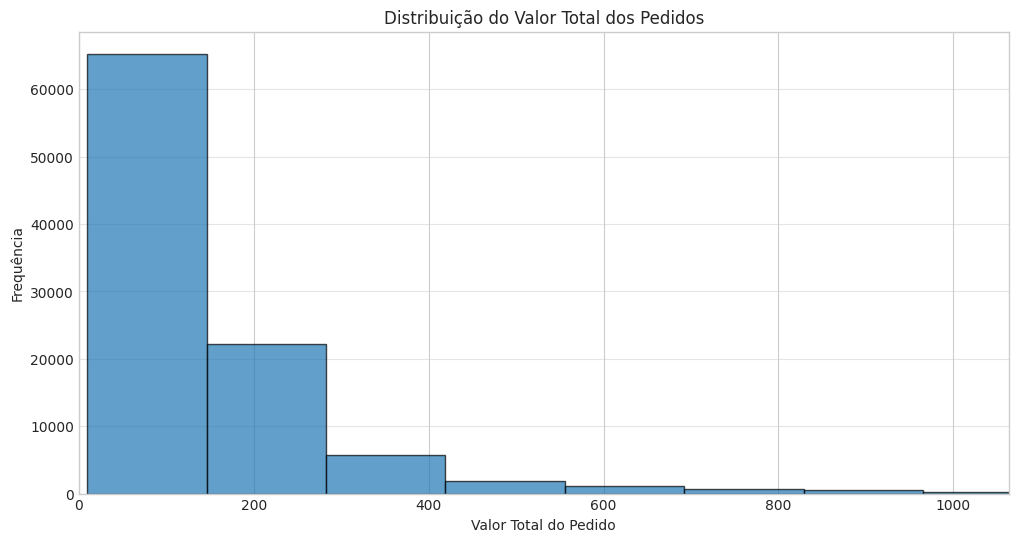

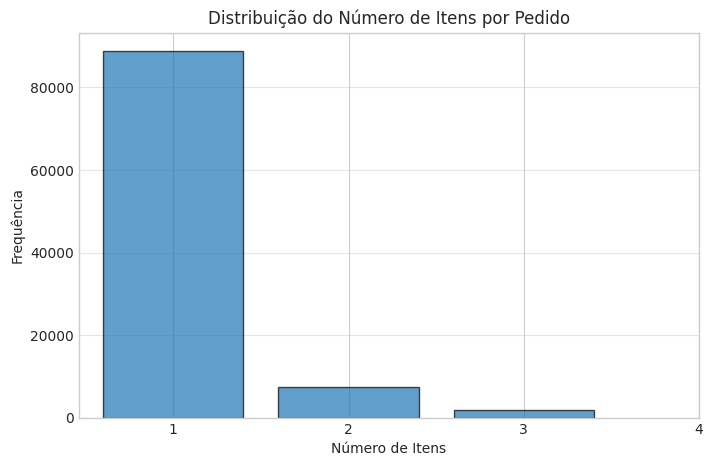

In [66]:
print("Visualização da Distribuição do Valor Total e Número de Itens")

if 'df_order_totals' in locals() and not df_order_totals.empty:
    try:
        plt.style.use('seaborn-v0_8-whitegrid') ## Definindo um estilo

        # Gráfico de Histograma
        plt.figure(figsize=(12, 6)) # Tamanho

        # bins define o número de "barras" no histograma.
        plt.hist(df_order_totals['total_order_value'], bins=100, edgecolor='black', alpha=0.7)
        plt.title('Distribuição do Valor Total dos Pedidos')
        plt.xlabel('Valor Total do Pedido')
        plt.ylabel('Frequência')
        plt.xlim(0, df_order_totals['total_order_value'].quantile(0.99)) # Mostra até o percentil 99
        plt.grid(axis='y', alpha=0.5)
        plt.show()

        # Histograma do Número de Itens por Pedido
        plt.figure(figsize=(8, 5))
        max_items_to_show = int(df_order_totals['num_items'].quantile(0.99)) + 1 # Mostra até o percentil 99 + 1
        plt.hist(df_order_totals['num_items'], bins=range(1, max_items_to_show + 1), align='left', rwidth=0.8, edgecolor='black', alpha=0.7)
        plt.title('Distribuição do Número de Itens por Pedido')
        plt.xlabel('Número de Itens')
        plt.ylabel('Frequência')
        plt.xticks(range(1, max_items_to_show + 1)) 
        plt.grid(axis='y', alpha=0.5)
        plt.show() 

    except Exception as e:
        print(f"Ocorreu um erro ao gerar os gráficos: {e}")
else:
    print("DataFrame 'df_order_totals' não encontrado. Por favor, execute os passos anteriores.")


Gráfico de Número de Pedidos por Mês


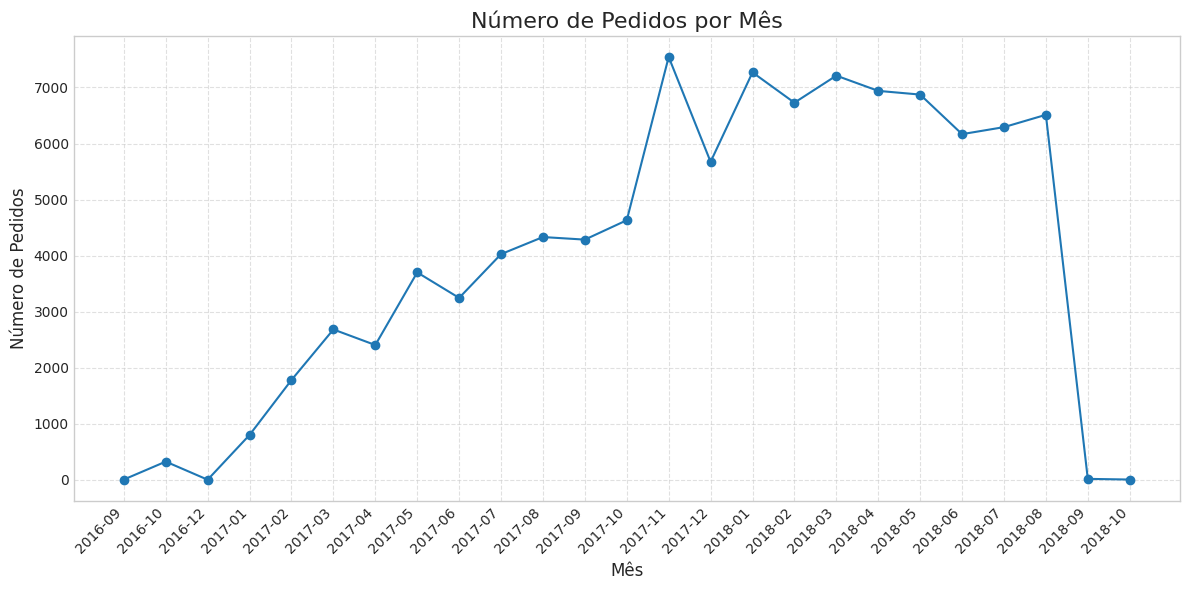

In [70]:
print("Gráfico de Número de Pedidos por Mês")

if 'df_orders_by_month' in locals() and not df_orders_by_month.empty:
    try:
        # Criar o gráfico de linha
        plt.figure(figsize=(12, 6)) # tamanho
        plt.plot(df_orders_by_month['order_month'], df_orders_by_month['total_orders'], marker='o', linestyle='-') 

        # Adicionar títulos e rótulos
        plt.title('Número de Pedidos por Mês', fontsize=16)
        plt.xlabel('Mês', fontsize=12)
        plt.ylabel('Número de Pedidos', fontsize=12)

        # Melhorar a legibilidade 
        plt.xticks(rotation=45, ha='right') 
        
        # Adicionar grade para facilitar a leitura
        plt.grid(True, linestyle='--', alpha=0.6)

        # Ajustar layout para evitar cortes nos rótulos
        plt.tight_layout()

        # Mostrar o gráfico
        plt.show()

    except Exception as e:
        print(f"Ocorreu um erro ao gerar o gráfico de pedidos por mês: {e}")
else:
    print("DataFrame 'df_orders_by_month' não encontrado ou vazio. Por favor, execute o Passo 3p primeiro.")


Análise de Performance de Produtos por Receita (Top 10 Categorias)
Top 10 Categorias de Produtos por Receita:
| product_category      |   total_revenue |   total_items_sold |
|:----------------------|----------------:|-------------------:|
| health_beauty         |      1441248.07 |               9670 |
| watches_gifts         |      1305541.61 |               5991 |
| bed_bath_table        |      1241681.72 |              11115 |
| sports_leisure        |      1156656.48 |               8641 |
| computers_accessories |      1059272.40 |               7827 |
| furniture_decor       |       902511.79 |               8334 |
| housewares            |       778397.77 |               6964 |
| cool_stuff            |       719329.95 |               3796 |
| auto                  |       685384.32 |               4235 |
| garden_tools          |       584219.21 |               4347 |


/tmp/ipykernel_57581/3530831643.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category', data=df_revenue_by_category, palette='viridis')


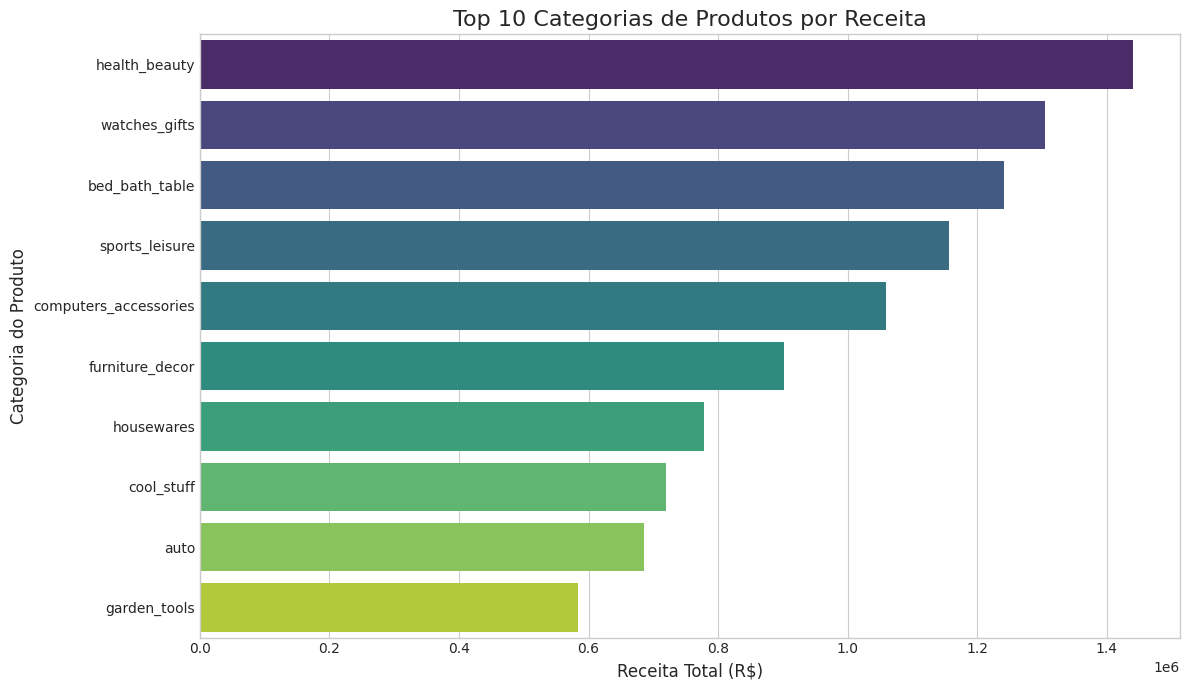

In [ ]:
print("Análise de Performance de Produtos por Receita (Top 10 Categorias)")
if 'conn' not in locals() or conn is None:
    try:
        db_name = 'fadesp_desafio.db'
        conn = sqlite3.connect(db_name)
        print(f"Conectado ao banco de dados: {db_name}")
    except Exception as e:
        print(f"Erro ao reconectar ao banco de dados: {e}")
        conn = None
if conn:
    try:
        query_revenue_by_category = """
        SELECT
            pc.product_category_name_english AS product_category,
            SUM(oi.price + oi.freight_value) AS total_revenue,
            COUNT(oi.order_item_id) AS total_items_sold
        FROM itens_pedidos AS oi
        JOIN produtos AS p ON oi.product_id = p.product_id
        LEFT JOIN categorias_produtos AS pc ON p.product_category_name = pc.product_category_name
        GROUP BY pc.product_category_name_english
        ORDER BY total_revenue DESC
        LIMIT 10;
        """
        df_revenue_by_category = pd.read_sql_query(query_revenue_by_category, conn)
        print("Top 10 Categorias de Produtos por Receita:")
        print(df_revenue_by_category.to_markdown(index=False, floatfmt=".2f"))
        # Visualização
        if not df_revenue_by_category.empty:
            plt.figure(figsize=(12, 7))
            sns.barplot(x='total_revenue', y='product_category', data=df_revenue_by_category, palette='viridis')
            plt.title('Top 10 Categorias de Produtos por Receita', fontsize=16)
            plt.xlabel('Receita Total (R$)', fontsize=12)
            plt.ylabel('Categoria do Produto', fontsize=12)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao analisar a performance de produtos por receita: {e}")
else:
    print("Não foi possível conectar ao banco de dados para analisar a performance de produtos.")


Análise da Distribuição das Notas de Avaliação
Distribuição das Notas de Avaliação:
|   review_score |   total_reviews |
|---------------:|----------------:|
|              5 |           57328 |
|              4 |           19142 |
|              3 |            8179 |
|              2 |            3151 |
|              1 |           11424 |


/tmp/ipykernel_57581/3653304440.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='total_reviews', data=df_review_scores, palette='viridis')


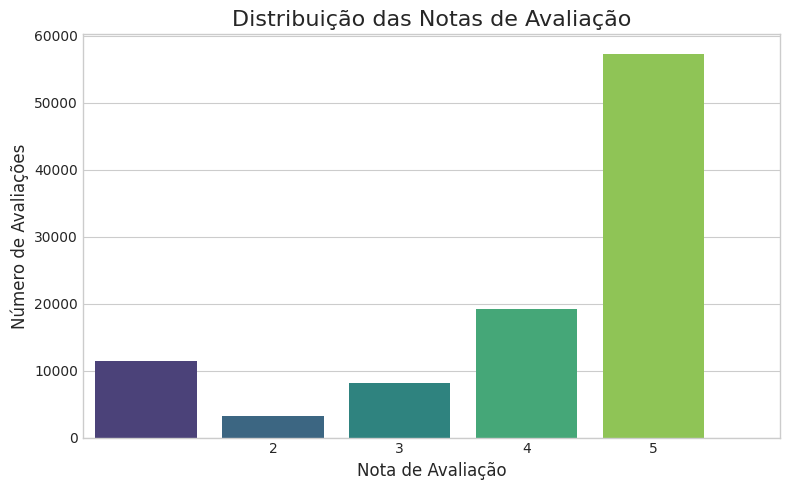

In [ ]:
print("Análise da Distribuição das Notas de Avaliação")
if 'conn' not in locals() or conn is None:
    try:
        db_name = 'fadesp_desafio.db'
        conn = sqlite3.connect(db_name)
        print(f"Conectado ao banco de dados: {db_name}")
    except Exception as e:
        print(f"Erro ao reconectar ao banco de dados: {e}")
        conn = None
if conn:
    try:
        query_review_scores = """
        SELECT
            review_score,
            COUNT(review_id) AS total_reviews
        FROM avaliacoes_pedidos
        GROUP BY review_score
        ORDER BY review_score DESC;
        """
        df_review_scores = pd.read_sql_query(query_review_scores, conn)
        print("Distribuição das Notas de Avaliação:")
        print(df_review_scores.to_markdown(index=False))
        # Visualização (Gráfico de Barras)
        if not df_review_scores.empty:
            plt.figure(figsize=(8, 5))
            sns.barplot(x='review_score', y='total_reviews', data=df_review_scores, palette='viridis')
            plt.title('Distribuição das Notas de Avaliação', fontsize=16)
            plt.xlabel('Nota de Avaliação', fontsize=12)
            plt.ylabel('Número de Avaliações', fontsize=12)
            plt.xticks(sorted(df_review_scores['review_score'].unique())) 
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao analisar a distribuição das notas de avaliação: {e}")
else:
    print("Não foi possível conectar ao banco de dados para analisar a distribuição das notas de avaliação.")

## 5. Finalização

##### Fechar a conexão com o banco de dados, se ainda estiver aberta.

In [75]:
if 'conn' in locals() and conn is not None:
    try:
        conn.close()
        print("\nConexão com o banco de dados fechada ao final da análise.")
    except Exception as e:
        print(f"Erro ao fechar a conexão com o banco de dados: {e}")


Conexão com o banco de dados fechada ao final da análise.


##### Esta análise exploratória forneceu uma visão abrangente dos dados do e-commerce, revelando padrões importantes no comportamento de clientes e vendedores, tendências de vendas ao longo do tempo, desempenho de produtos e a dinâmica logística e de avaliações.

##### É importante notar que esta foi uma análise inicial. Cada um dos pontos explorados pode ser aprofundado, e novas análises podem ser realizadas para descobrir correlações mais complexas.